In [1]:
%load_ext autoreload
%autoreload 2

# Plot of learning curves

In [2]:
import numpy as np
import torch

In [3]:
log_path = 'result_visual/result_init.csv'

data = np.loadtxt(log_path, delimiter=',', skiprows=0)
print(data.shape)
## 4 column: mac_ra(running average), edl_ra, mac, edl
## 50 rows: 25 epochs x (val_acc, val_loss)

(50, 4)


In [4]:
acc_ind = np.arange(0, 50, 2)
loss_ind = np.arange(1, 50, 2)

In [5]:
acc_data = data[acc_ind]
loss_data = data[loss_ind]

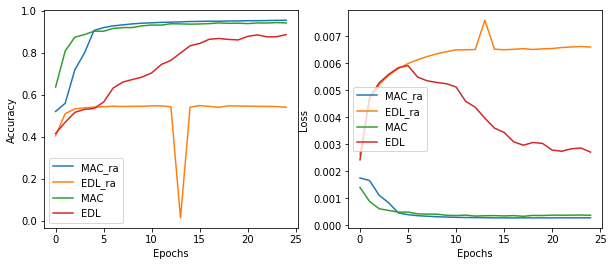

In [6]:
import matplotlib.pyplot as plt

legend_list = ['MAC_ra', 'EDL_ra', 'MAC', 'EDL']

# f, axs = plt.subplots(1,2,figsize=(10,5))
plt.figure(figsize=(10,4))
plt.subplot(121)
for i in range(4):
    plt.plot(acc_data[:,i], label=legend_list[i])
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.subplot(122)
for i in range(4):
    plt.plot(loss_data[:,i], label=legend_list[i])
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()

plt.show()

In [7]:
acc_data

array([[0.51954, 0.40352, 0.63548, 0.41499],
       [0.55849, 0.50924, 0.80726, 0.46808],
       [0.71776, 0.53153, 0.87313, 0.5152 ],
       [0.79719, 0.53654, 0.88523, 0.52929],
       [0.90539, 0.53991, 0.90135, 0.53373],
       [0.91866, 0.54193, 0.90143, 0.56421],
       [0.92698, 0.5443 , 0.91469, 0.63146],
       [0.93153, 0.543  , 0.91856, 0.65927],
       [0.93644, 0.54379, 0.91894, 0.67158],
       [0.93956, 0.54407, 0.92692, 0.68309],
       [0.94136, 0.54607, 0.9309 , 0.70311],
       [0.94357, 0.54634, 0.93046, 0.74297],
       [0.94465, 0.54163, 0.93696, 0.76284],
       [0.94579, 0.01268, 0.93618, 0.79781],
       [0.94752, 0.53987, 0.93502, 0.83207],
       [0.94818, 0.54736, 0.93596, 0.84325],
       [0.94918, 0.54338, 0.93764, 0.86323],
       [0.94884, 0.53926, 0.94093, 0.86671],
       [0.95017, 0.54612, 0.93886, 0.86225],
       [0.95038, 0.54542, 0.93968, 0.85998],
       [0.95153, 0.54473, 0.93767, 0.87691],
       [0.9515 , 0.54379, 0.94074, 0.8838 ],
       [0.

# Loading model

In [8]:
from src.load_model import Load_model

In [9]:
# # choose best model
# best_model_ind = acc_data.argmax(axis = 0)
# print(best_model_ind)
# # [24 15 23 24]

In [14]:
# model_type = 'MAC'
# model_type = 'EDL'
model_type = 'PredU'

In [15]:
# model_path = 'checkpoint/checkpoint_25.model'       # MAC model. (running avg)
# model_path = 'checkpoint_edl/checkpoint_16.model'     # EDL model. (running avg)
# model_path = '../mac_2/checkpoint/checkpoint_24.model'     # MAC model. 
# model_path = '../mac_2/checkpoint_edl/checkpoint_25.model'     # EDL model. 
# model_path = 'data/0_result/checkpoint_predu/checkpoint.model'    # Predictive Uncertainty model. (running avg)


if model_type == 'MAC':    # 95.364%
    model_path = 'result/saved_model/mac_ra.model'       
elif model_type == 'EDL':  # 88.517%
    model_path = 'result/saved_model/mac_edl_nra.model'
elif model_type == 'PredU':   # 89.54%   % 93.24%. last model
    model_path = 'result/saved_model/mac_predu_ra.model'
else:
    print('wrong model type')

print(model_type, 'model path: ', model_path )

PredU model path:  result/saved_model/mac_predu_ra.model


In [13]:
model_ld_edl = Load_model(model_path, model_type)
model_ld_edl.evaluate()

Evaluating loaded model on validation dataset.....
Data loader created.



Validation Accuracy: 0.88537
Validation Loss: 0.00331580
Evaluation time: 381.39 seconds


In [16]:
model_ld_predu = Load_model(model_path, model_type)
model_ld_predu.evaluate()

Evaluating loaded model on validation dataset.....
Data loader created.



Validation Accuracy: 0.95364
Validation Loss: 0.00026891
Evaluation time: 372.30 seconds


In [ ]:
### the inference result is different everytime because of random seed?

### Standard MAC model
# Validation Accuracy: 0.95406
# Validation Loss: 0.00027037
# Evaluation time: 386.96 seconds

### MAC-EDL model
# Validation Accuracy: 0.88537
# Validation Loss: 0.00331580
# Evaluation time: 381.42 seconds

### Predictive uncertainty model
# Validation Accuracy: 0.95364
# Validation Loss: 0.00026891
# Evaluation time: 372.93 seconds

# Uncertainty performance comparison: EDL and predU

In [17]:
# loading predictions & uncertainties
uc_edl = torch.cat(model_ld_edl.out_uncertainty, dim=0).cpu().numpy()
corr_edl = torch.cat(model_ld_edl.out_correct, dim=0).cpu().numpy()
corr_edl = 1 - corr_edl

uc_predu = torch.cat(model_ld_predu.out_uncertainty, dim=0).cpu().numpy()
corr_predu = torch.cat(model_ld_predu.out_correct, dim=0).cpu().numpy()
corr_predu = 1 - corr_predu

In [18]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

AUC of EDL:  0.9209802557926634
AUC of predictive uncertainty:  0.7035901961319904


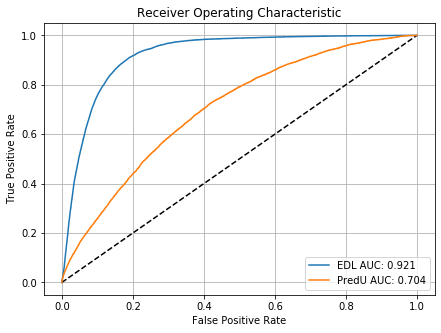

In [20]:
fpr_edl, tpr_edl, thresholds_edl = roc_curve(corr_edl, uc_edl)
fpr_predu, tpr_predu, thresholds_predu = roc_curve(corr_predu, uc_predu)

auc_edl = roc_auc_score(corr_edl, uc_edl)
auc_predu = roc_auc_score(corr_predu, uc_predu)

plt.figure(figsize=(7,5))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_edl, tpr_edl, label='EDL AUC: {0:.3f}'.format(auc_edl))
plt.plot(fpr_predu, tpr_predu, label='PredU AUC: {0:.3f}'.format(auc_predu))
plt.legend()
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.grid()


print('AUC of EDL: ', auc_edl)
print('AUC of predictive uncertainty: ', auc_predu)



In [17]:
### the inference result is different everytime because of random seed?

### Standard MAC model
# Validation Accuracy: 0.95406
# Validation Loss: 0.00027037
# Evaluation time: 386.96 seconds

### MAC-EDL model
# Validation Accuracy: 0.88537
# Validation Loss: 0.00331580
# Evaluation time: 381.42 seconds

### Predictive uncertainty model
# Validation Accuracy: 0.95364
# Validation Loss: 0.00026891
# Evaluation time: 372.93 seconds

# Loading data and preprocess

In [21]:
idd = np.arange(149991)
np.random.shuffle(idd)
idd[0:10]

array([ 62122,  70625,  18704,  80424, 117472,  99499, 127416,  69389,
        27041,  40683])

In [22]:
from src.run_inference import *

with open('data/clevr/CLEVR_v1.0/questions/CLEVR_val_questions.json') as f:
    data = json.load(f)
    
dataset_type = 'CLEVR'
with open(f'data/{dataset_type}_dic.pkl', 'rb') as f:
    dic = pickle.load(f)
ans_dict = {v: k for k, v in dic['answer_dic'].items()}

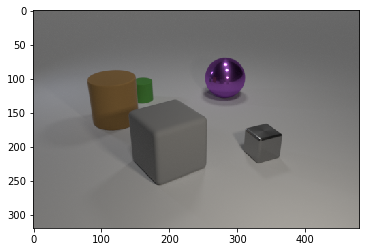

Question:	 Are there any other things that are the same shape as the big metallic object?
Answer:		 no
Pred: no [[1.2185066e-19]]


In [26]:
tt = 0
full_data = data['questions'][tt]
img_path, qst, ans = visualize_data(full_data, show = True)

features, question, q_len = feature_processing(img_path, qst)

if model_type == 'MAC':    # 95.36%
    pred_ans = model_ld.predict(features, question, [q_len])
    print('Pred:', ans_dict[ pred_ans.argmax(axis =1)[0] ])
elif model_type == 'EDL':  # 88.51%
    pred_ans, U = model_ld.predict(features, question, [q_len])
    print('Pred:',ans_dict[ pred_ans.argmax(axis =1)[0] ], U)
elif model_type == 'PredU':   # 89.54%
    pred_ans, var = model_ld.predict(features, question, [q_len])
    print('Pred:',ans_dict[ pred_ans.argmax(axis =1)[0] ], var)
else:
    print('wrong model type')

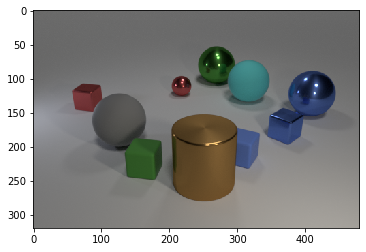

Question:	 There is another large sphere that is made of the same material as the big green sphere; what color is it?
Answer:		 blue
blue blue 



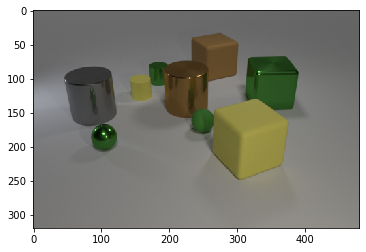

Question:	 What is the size of the green thing that is right of the yellow matte object right of the brown matte object?
Answer:		 large
large large 



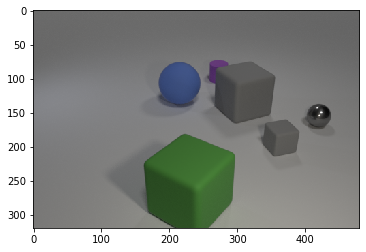

Question:	 Does the tiny object that is to the right of the tiny gray cube have the same shape as the blue object left of the tiny metal object?
Answer:		 yes
yes yes 



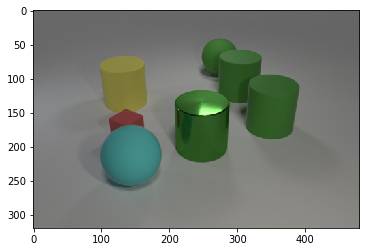

Question:	 Is the sphere in front of the small block made of the same material as the big thing that is to the left of the large cyan matte thing?
Answer:		 yes
yes yes 



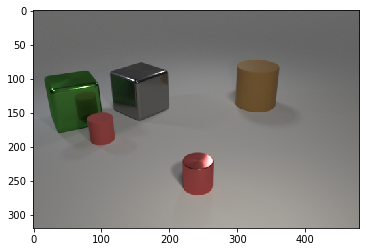

Question:	 Is the material of the large gray thing the same as the big brown thing?
Answer:		 no
no no 



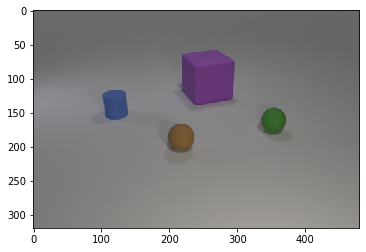

Question:	 There is a tiny object that is on the right side of the blue cylinder and on the left side of the matte cube; what is its shape?
Answer:		 sphere
sphere sphere 



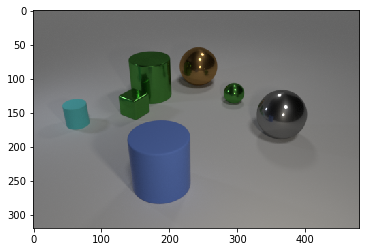

Question:	 There is a blue thing that is the same shape as the cyan rubber object; what material is it?
Answer:		 rubber
rubber rubber 



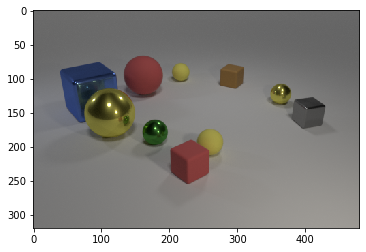

Question:	 What is the color of the big sphere that is made of the same material as the brown cube?
Answer:		 red
red red 



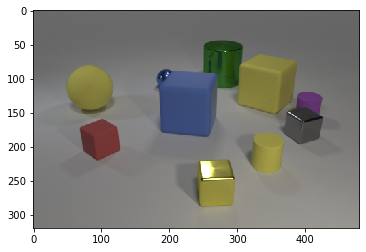

Question:	 What number of objects are either tiny cubes or large matte cubes?
Answer:		 5
5 5 



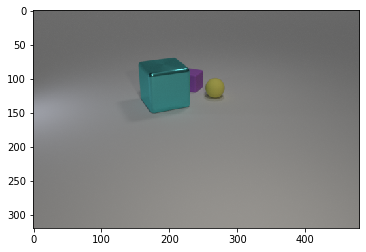

Question:	 How many objects are behind the large cyan block and in front of the yellow rubber object?
Answer:		 0
0 0 



In [85]:
# normal

for i in idd[0:10]:
    full_data = data['questions'][i]
    img_path, qst, ans = visualize_data(full_data, show = True)
    features, question, q_len = feature_processing(img_path, qst)
    pred_ans = model_ld.predict(features, question, [q_len])
    print(ans, ans_dict[ pred_ans.argmax(axis =1)[0] ], '\n' )

In [94]:
# EDL
for i in idd[0:10]:
    full_data = data['questions'][i]
    img_path, qst, ans = visualize_data(full_data, show = False)
    features, question, q_len = feature_processing(img_path, qst)
    pred_ans, U = model_ld.predict(features, question, [q_len])
    print(ans, ans_dict[ pred_ans.argmax(axis =1)[0] ], U, '\n' )

Question:	 There is another large sphere that is made of the same material as the big green sphere; what color is it?
Answer:		 blue
blue blue [[0.25183013]] 

Question:	 What is the size of the green thing that is right of the yellow matte object right of the brown matte object?
Answer:		 large
large large [[0.06774838]] 

Question:	 Does the tiny object that is to the right of the tiny gray cube have the same shape as the blue object left of the tiny metal object?
Answer:		 yes
yes yes [[0.20305085]] 

Question:	 Is the sphere in front of the small block made of the same material as the big thing that is to the left of the large cyan matte thing?
Answer:		 yes
yes yes [[0.28751233]] 

Question:	 Is the material of the large gray thing the same as the big brown thing?
Answer:		 no
no no [[0.5299525]] 

Question:	 There is a tiny object that is on the right side of the blue cylinder and on the left side of the matte cube; what is its shape?
Answer:		 sphere
sphere sphere [[0.32878667]]

In [28]:
# Pred_U
for i in idd[0:10]:
    full_data = data['questions'][i]
    img_path, qst, ans = visualize_data(full_data, show = False)
    features, question, q_len = feature_processing(img_path, qst)
    pred_ans, var = model_ld.predict(features, question, [q_len])
    print(ans, ans_dict[ pred_ans.argmax(axis =1)[0] ], var, '\n' )

Question:	 How many small matte blocks are on the left side of the block that is in front of the object that is on the right side of the small purple rubber cube?
Answer:		 0
0 0 [[1.0599793e-17]] 

Question:	 There is a tiny thing that is the same color as the small block; what is its material?
Answer:		 rubber
rubber rubber [[1.9436588e-18]] 

Question:	 Are there more blue metallic things than red matte cylinders?
Answer:		 no
no no [[1.4675486e-17]] 

Question:	 What is the size of the brown metallic thing that is to the right of the shiny thing in front of the tiny gray shiny thing?
Answer:		 small
small small [[1.7873389e-20]] 

Question:	 Is the number of large brown rubber things greater than the number of small brown shiny blocks?
Answer:		 yes
yes yes [[2.2973033e-18]] 

Question:	 What number of matte things are red cubes or tiny things?
Answer:		 2
2 2 [[3.7237616e-17]] 

Question:	 Is there any other thing that has the same size as the purple cylinder?
Answer:		 no
no no [

# variation

In [ ]:
234#

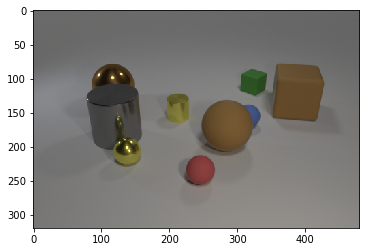

Question:	 Is the number of big rubber cubes greater than the number of rubber blocks?
Answer:		 no
Pred: yes [[0.40019506]]


In [129]:
tt = 234
full_data = data['questions'][tt]
img_path, qst, ans = visualize_data(full_data, show = True)

features, question, q_len = feature_processing(img_path, qst)

pred_ans, U = model_ld.predict(features, question, [q_len])
print('Pred:',ans_dict[ pred_ans.argmax(axis =1)[0] ], U)

In [144]:
qst = 'The number of big rubber cubes greater than the number of rubber blocks?'

features, question, q_len = feature_processing(img_path, qst)
pred_ans, U = model_ld.predict(features, question, [q_len])
print('Pred:',ans_dict[ pred_ans.argmax(axis =1)[0] ], U)

Pred: yes [[0.6446816]]


In [125]:
qst = 'Is the number of big rubber cubes less than the number of rubber blocks?'

features, question, q_len = feature_processing(img_path, qst)
pred_ans, U = model_ld.predict(features, question, [q_len])
print('Pred:',ans_dict[ pred_ans.argmax(axis =1)[0] ], U)

Pred: yes [[0.07473116]]


In [126]:
qst = 'Is the number of big rubber cubes same as the number of rubber blocks?'

features, question, q_len = feature_processing(img_path, qst)
pred_ans, U = model_ld.predict(features, question, [q_len])
print('Pred:',ans_dict[ pred_ans.argmax(axis =1)[0] ], U)

Pred: yes [[0.7230973]]


In [139]:
qst = 'What is the number of big rubber cubes?'
features, question, q_len = feature_processing(img_path, qst)

pred_ans, U = model_ld.predict(features, question, [q_len])
print('Pred:',ans_dict[ pred_ans.argmax(axis =1)[0] ], U)

Pred: 2 [[1.]]


In [121]:
qst = 'What is the number of big rubber blocks?'
features, question, q_len = feature_processing(img_path, qst)

pred_ans, U = model_ld.predict(features, question, [q_len])
print('Pred:',ans_dict[ pred_ans.argmax(axis =1)[0] ], U)

Pred: 2 [[1.]]


In [138]:
qst = 'How many rubber blocks are there?'
features, question, q_len = feature_processing(img_path, qst)

pred_ans, U = model_ld.predict(features, question, [q_len])
print('Pred:',ans_dict[ pred_ans.argmax(axis =1)[0] ], U)

Pred: 5 [[0.9828817]]


In [122]:
qst = 'What is the number of big rubber cubes?'
features, question, q_len = feature_processing(img_path, qst)

pred_ans, U = model_ld.predict(features, question, [q_len])
print('Pred:',ans_dict[ pred_ans.argmax(axis =1)[0] ], U)

Pred: 2 [[1.]]


In [136]:
qst = 'What is the number of large rubber spheres?'
features, question, q_len = feature_processing(img_path, qst)

pred_ans, U = model_ld.predict(features, question, [q_len])
print('Pred:',ans_dict[ pred_ans.argmax(axis =1)[0] ], U)

Pred: 2 [[1.]]


In [146]:
qst = 'What is the number of big rubber cubes?'
features, question, q_len = feature_processing(img_path, qst)

pred_ans, U = model_ld.predict(features, question, [q_len])
print('Pred:',ans_dict[ pred_ans.argmax(axis =1)[0] ], U)

Pred: 2 [[1.]]


# EDL uncertainty:

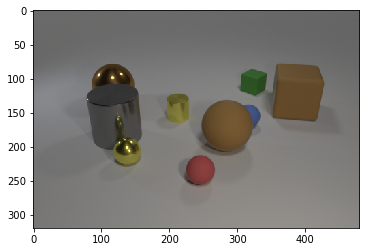

Question:	 What material is the brown cube that is the same size as the gray cylinder?
Answer:		 rubber
Pred: rubber [[0.14260997]]


In [132]:
tt = 236
full_data = data['questions'][tt]
img_path, qst, ans = visualize_data(full_data, show = True)

features, question, q_len = feature_processing(img_path, qst)

pred_ans, U = model_ld_edl.predict(features, question, [q_len])
print('Pred:',ans_dict[ pred_ans.argmax(axis =1)[0] ], U)

### one limitation: not using pre-trained word embeddings

In [33]:
# out of scope questions:

qst = 'What material has the large number of blocks?'
features, question, q_len = feature_processing(img_path, qst)

pred_ans, U = model_ld_edl.predict(features, question, [q_len])
print('Pred:',ans_dict[ pred_ans.argmax(axis =1)[0] ], U)

Pred: rubber [[0.9081387]]


In [47]:
# out of scope questions:

qst = 'What is the number of spheres and cubes?'
features, question, q_len = feature_processing(img_path, qst)

pred_ans, U = model_ld_edl.predict(features, question, [q_len])
print('Pred:',ans_dict[ pred_ans.argmax(axis =1)[0] ], U)

Pred: 1 [[0.9597545]]


In [48]:
# out of scope questions:

qst = 'What is the number of red spheres and yellow cubes?'
features, question, q_len = feature_processing(img_path, qst)

pred_ans, U = model_ld_edl.predict(features, question, [q_len])
print('Pred:',ans_dict[ pred_ans.argmax(axis =1)[0] ], U)

Pred: no [[0.11865562]]


In [51]:
# noisy questions:

qst = 'What material of brown cube has same size as gray cylinder?'
features, question, q_len = feature_processing(img_path, qst)

pred_ans, U = model_ld_edl.predict(features, question, [q_len])
print('Pred:',ans_dict[ pred_ans.argmax(axis =1)[0] ], U)

Pred: metal [[0.19664039]]


In [52]:
# noisy questions:

qst = 'What brown cube material has the same size as the gray cylinder?'
features, question, q_len = feature_processing(img_path, qst)

pred_ans, U = model_ld_edl.predict(features, question, [q_len])
print('Pred:',ans_dict[ pred_ans.argmax(axis =1)[0] ], U)

Pred: 1 [[0.995997]]


Pred: rubber [[0.26444364]]


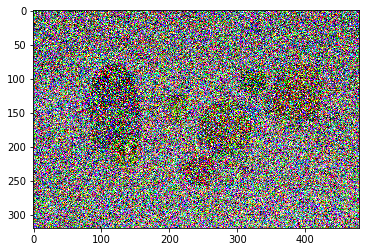

In [149]:
# noisy images:

from PIL import Image
import cv2
img = Image.open(img_path).convert('RGB')
a = np.asarray(img)
# a = skimage.util.random_noise(a, mode='gaussian', var =0.1)  # gaussian: 0.01
a = skimage.util.random_noise(a, mode='s&p', amount =0.5)  # s&p: 0.05

norm_image = cv2.normalize(a, None, alpha = 0, beta = 255, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F)
# norm_image.astype(np.uint8)
img_after = Image.fromarray(norm_image.astype(np.uint8))
imgplot = plt.imshow(img_after)

features, question, q_len = feature_processing(img_path, qst, img_data = img_after)

pred_ans, U = model_ld_edl.predict(features, question, [q_len])
print('Pred:',ans_dict[ pred_ans.argmax(axis =1)[0] ], U)

Pred: rubber [[0.48166886]]


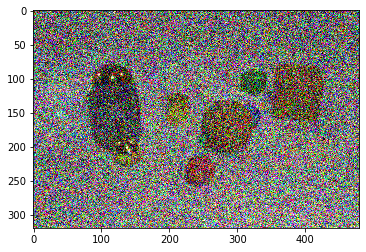

In [150]:
# noisy images:

from PIL import Image
import cv2
img = Image.open(img_path).convert('RGB')
a = np.asarray(img)
a = skimage.util.random_noise(a, mode='gaussian', var =0.1)  # gaussian: 0.01
# a = skimage.util.random_noise(a, mode='s&p', amount =0.9)  # s&p: 0.05

norm_image = cv2.normalize(a, None, alpha = 0, beta = 255, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F)
# norm_image.astype(np.uint8)
img_after = Image.fromarray(norm_image.astype(np.uint8))
imgplot = plt.imshow(img_after)

features, question, q_len = feature_processing(img_path, qst, img_data = img_after)

pred_ans, U = model_ld_edl.predict(features, question, [q_len])
print('Pred:',ans_dict[ pred_ans.argmax(axis =1)[0] ], U)

In [165]:
# out of scope images:

Pred: 2 [[1.]]


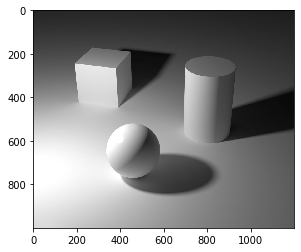

In [175]:
new_img_path = 'new_img.jpg'

from PIL import Image
import cv2
img = Image.open(new_img_path).convert('RGB')
# a = np.asarray(img)
# a = skimage.util.random_noise(a, mode='gaussian', var =0.1)  # gaussian: 0.01
# a = skimage.util.random_noise(a, mode='s&p', amount =0.5)  # s&p: 0.05

# norm_image = cv2.normalize(a, None, alpha = 0, beta = 255, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F)
# norm_image.astype(np.uint8)
# img_after = Image.fromarray(norm_image.astype(np.uint8))
imgplot = plt.imshow(img)

qst = 'What is the number of cubes?'
features, question, q_len = feature_processing(img_path, qst, img_data = img)

pred_ans, U = model_ld_edl.predict(features, question, [q_len])
print('Pred:',ans_dict[ pred_ans.argmax(axis =1)[0] ], U)

Pred: 3 [[0.96760654]]


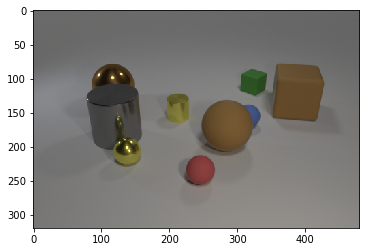

In [167]:
from PIL import Image
import cv2
img = Image.open(img_path).convert('RGB')
# a = np.asarray(img)
# a = skimage.util.random_noise(a, mode='gaussian', var =0.1)  # gaussian: 0.01
# a = skimage.util.random_noise(a, mode='s&p', amount =0.5)  # s&p: 0.05

# norm_image = cv2.normalize(a, None, alpha = 0, beta = 255, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F)
# norm_image.astype(np.uint8)
# img_after = Image.fromarray(norm_image.astype(np.uint8))
imgplot = plt.imshow(img)

qst = 'How many spheres in are there?'
features, question, q_len = feature_processing(img_path, qst, img_data = img)

pred_ans, U = model_ld_edl.predict(features, question, [q_len])
print('Pred:',ans_dict[ pred_ans.argmax(axis =1)[0] ], U)

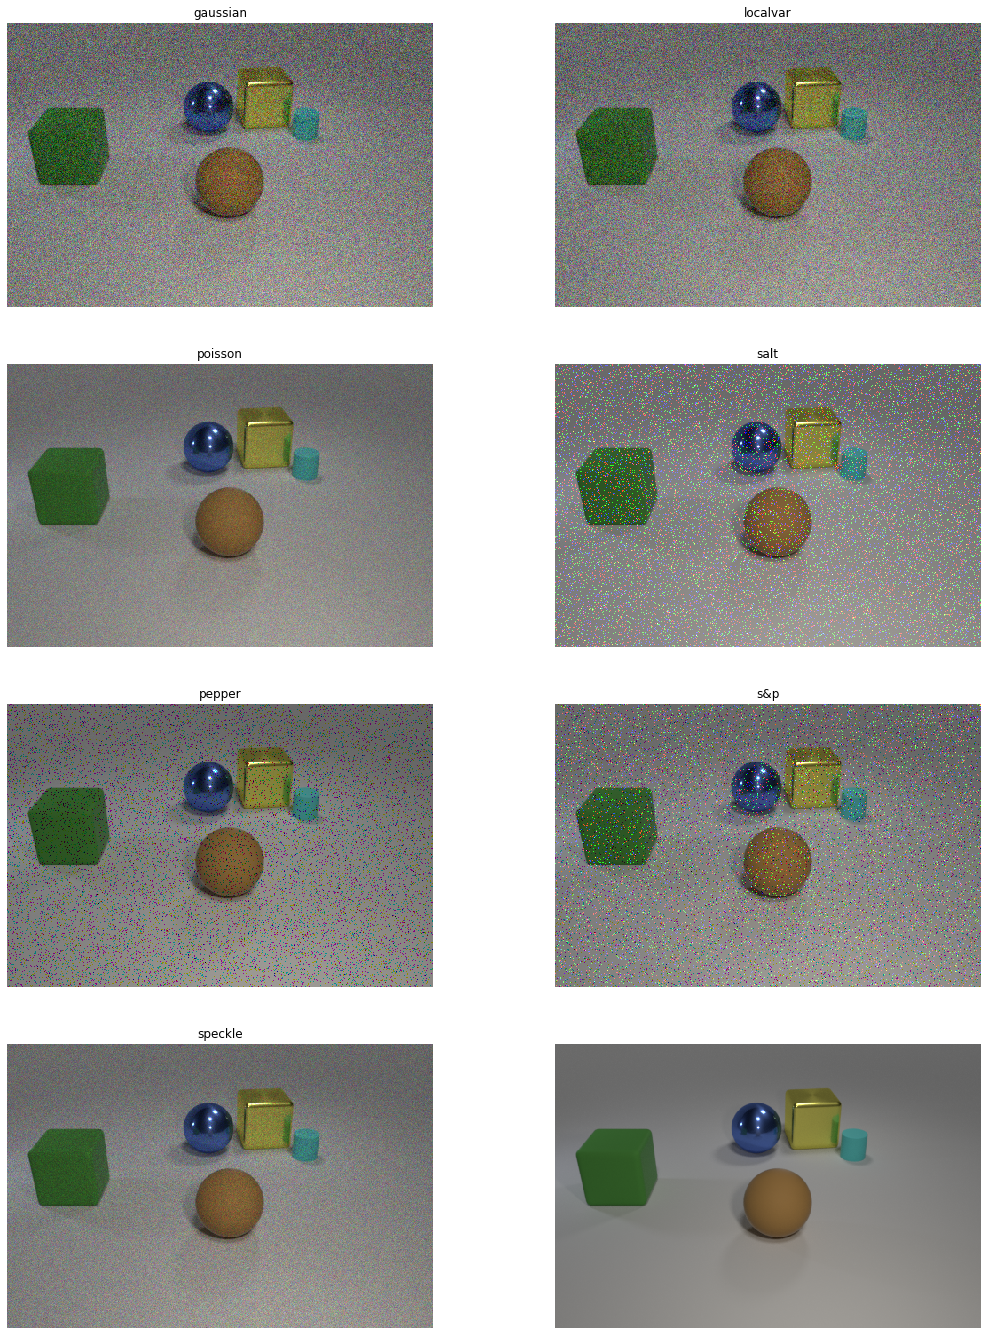

In [83]:
import skimage

def plotnoise(img, mode, r, c, i):
    plt.subplot(r,c,i)
    if mode is not None:
        gimg = skimage.util.random_noise(img, mode=mode)
        plt.imshow(gimg)
    else:
        plt.imshow(img)
    plt.title(mode)
    plt.axis("off")

plt.figure(figsize=(18,24))
r=4
c=2
plotnoise(a, "gaussian", r,c,1)
plotnoise(a, "localvar", r,c,2)
plotnoise(a, "poisson", r,c,3)
plotnoise(a, "salt", r,c,4)
plotnoise(a, "pepper", r,c,5)
plotnoise(a, "s&p", r,c,6)
plotnoise(a, "speckle", r,c,7)
plotnoise(a, None, r,c,8)
plt.show()

# analysis of uncertainty performance for different q_type, q_family